Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



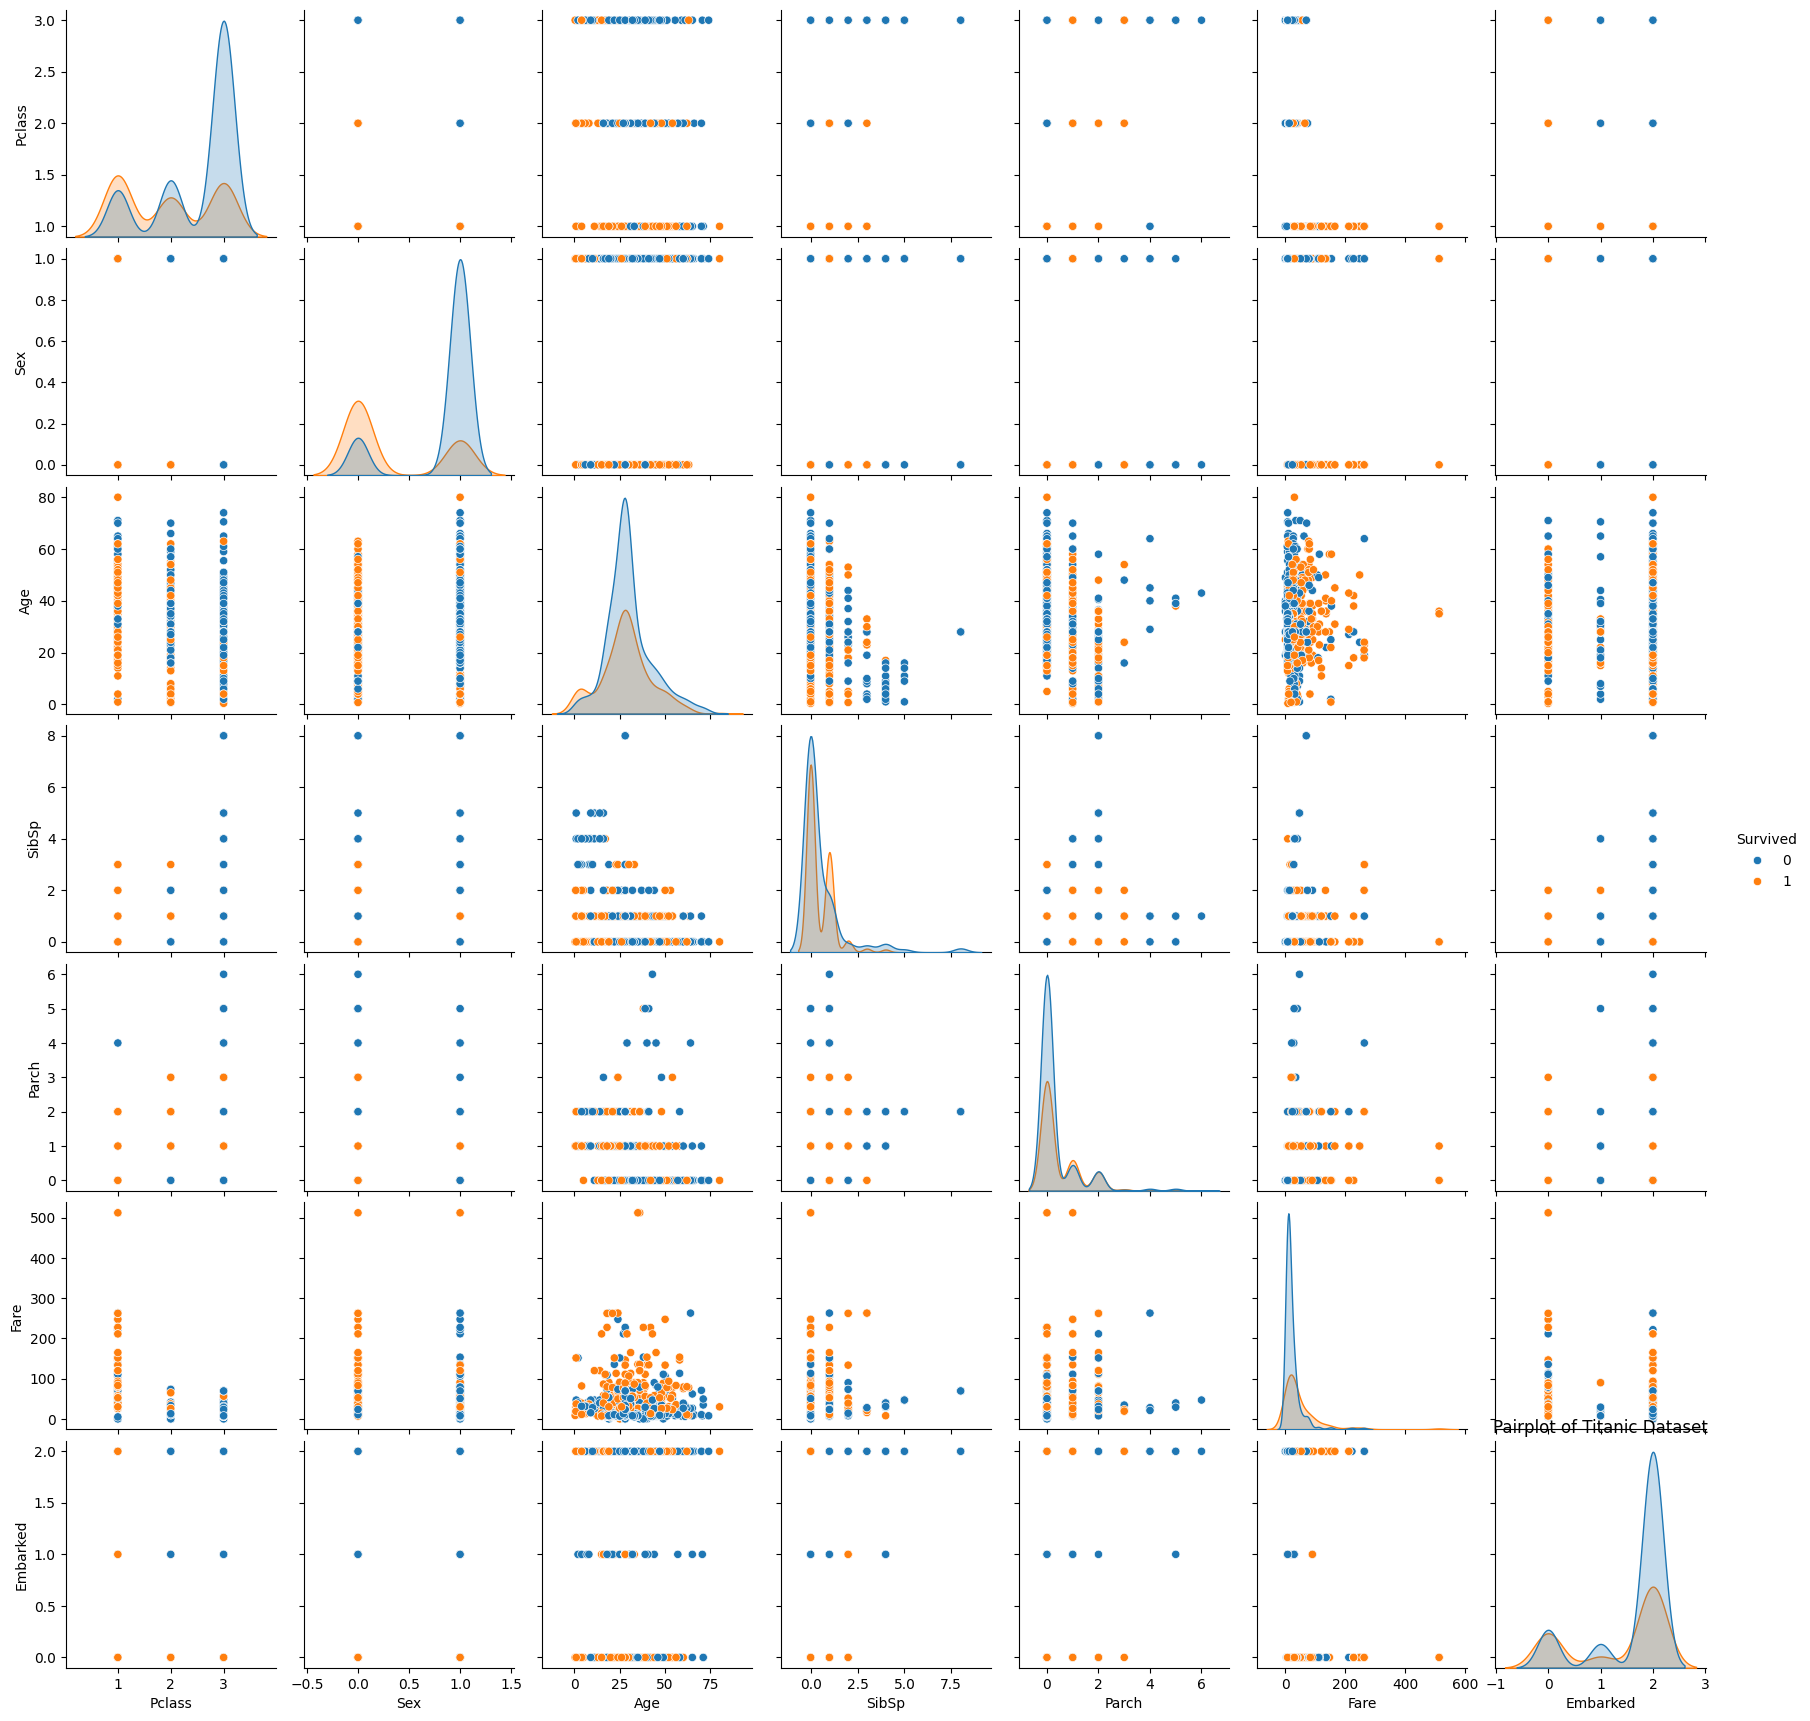

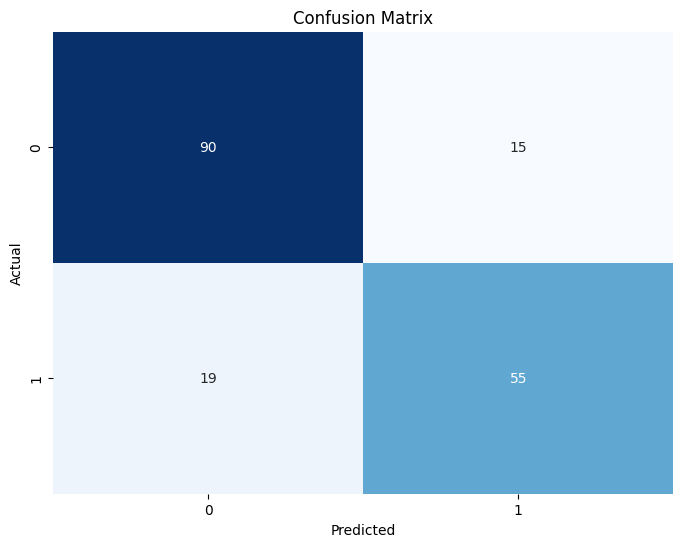

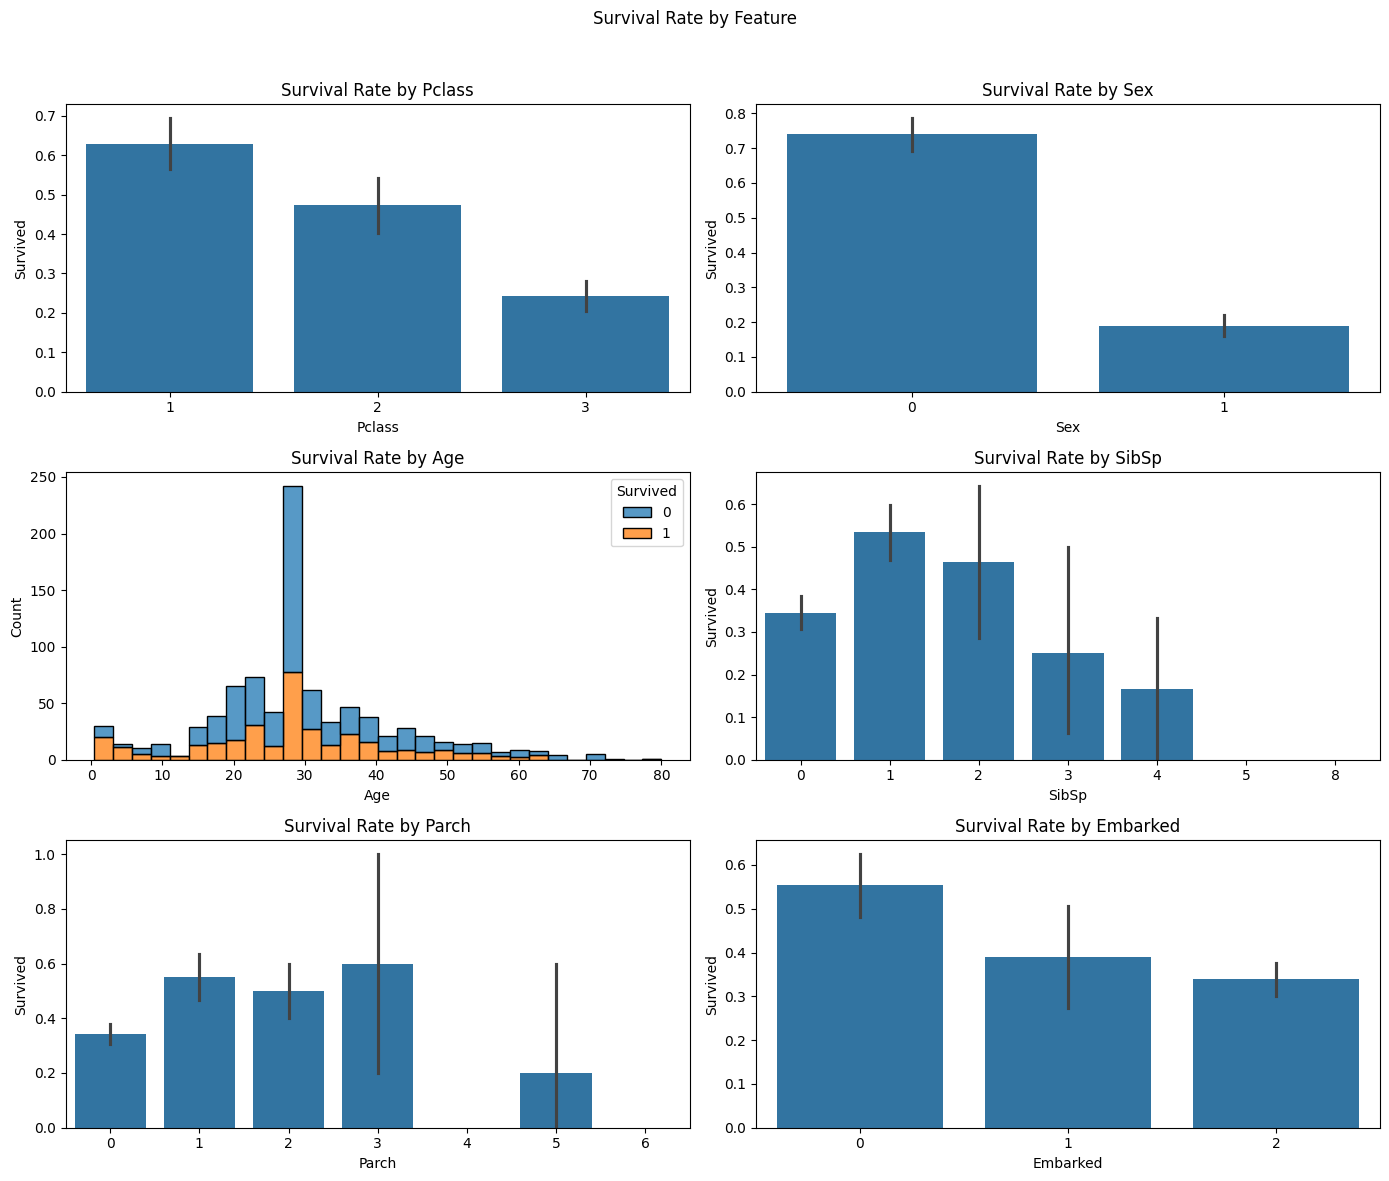

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_splitsss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset from a local file path
file_path = '/content/Titanic-Dataset.csv'  # Replace with your file path
titanic_data = pd.read_csv(file_path)

# Handle missing values and data preprocessing
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize a pairplot of the dataset
sns.pairplot(titanic_data[features + ['Survived']], hue='Survived')
plt.title('Pairplot of Titanic Dataset')
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the survival rate by each feature
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Survival Rate by Feature')

# Pclass
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_data)
axes[0, 0].set_title('Survival Rate by Pclass')

# Sex
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_data)
axes[0, 1].set_title('Survival Rate by Sex')

# Age (histogram)
sns.histplot(ax=axes[1, 0], data=titanic_data, x='Age', hue='Survived', multiple='stack')
axes[1, 0].set_title('Survival Rate by Age')

# SibSp
sns.barplot(ax=axes[1, 1], x='SibSp', y='Survived', data=titanic_data)
axes[1, 1].set_title('Survival Rate by SibSp')

# Parch
sns.barplot(ax=axes[2, 0], x='Parch', y='Survived', data=titanic_data)
axes[2, 0].set_title('Survival Rate by Parch')

# Embarked
sns.barplot(ax=axes[2, 1], x='Embarked', y='Survived', data=titanic_data)
axes[2, 1].set_title('Survival Rate by Embarked')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
